### Importing the libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data= pd.read_csv(r"C:\Users\gkish\Downloads\archive (8)\Salary Data.csv")
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
# Head of the Dataset
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# The Shape of the dataset
data.shape

(375, 6)

In [5]:
# Using df.dtypes, we get the list of types of all the columns in our dataset.
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [6]:
# Info of the dataset
# info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.
# Finding out if the dataset contains any null value 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [7]:
#Summary of the dataset
#Statistical summary
data.describe()


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [8]:
#Numerical Features
data.dtypes[data.dtypes!='object'].index

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [9]:
num_features = data.dtypes[data.dtypes!='object'].index
num_features

Index(['Age', 'Years of Experience', 'Salary'], dtype='object')

In [10]:
# Summarize numerical features
data[num_features].describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [11]:
#Distribution of Categorical Features
cat_features = data.dtypes[data.dtypes == 'object'].index
cat_features

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [12]:
data[cat_features].describe()

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


### Check the Unique Lables in the categorical variables


In [13]:
# Check the unique lables of the 'Gender' variable
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
# Print the no of counts for Gender variable
data.Gender.value_counts()

Male      194
Female    179
Name: Gender, dtype: int64

In [15]:
# Check the unique lables of the 'Education Level' variable
data['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan], dtype=object)

In [16]:
# Print the no of counts for Education Level variable
data['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [17]:
# Check the unique lables of the 'job Title' variable
data['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

### Data Cleaning

##### Drop the Duplicates
* check is there any duplicates rows are exist then we should remove from the dataframe.

In [18]:
# check the shape before drop the duplicates
data.shape

(375, 6)

In [19]:
data[data.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [20]:
data=data.drop_duplicates().reset_index(drop=True)

In [21]:
data.shape

(325, 6)

### Check the Null Values
* Using.isnull.sum() function we can see the null values present in the every column in the dataset.

In [22]:
data.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

<AxesSubplot:>

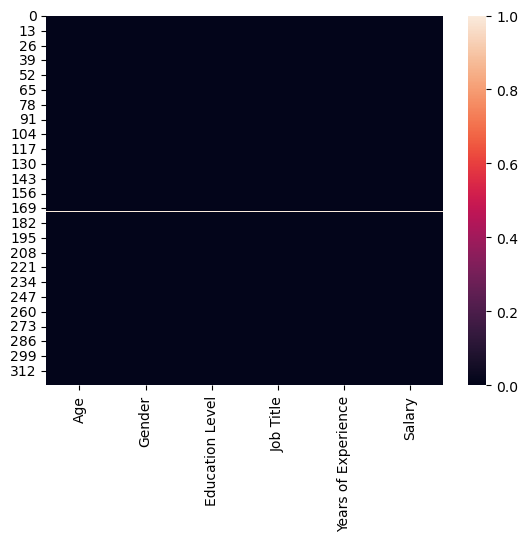

In [23]:
sns.heatmap(data.isnull())

In [24]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Education Level'].fillna(data['Education Level'].mode()[0],inplace=True)
data['Job Title'].fillna(data['Job Title'].mode()[0],inplace=True)
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Years of Experience'].fillna(data['Years of Experience'].mean(),inplace=True)
data['Salary'].fillna(data['Salary'].mean(),inplace=True)


In [25]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### Data Visualization
#### Histograms
* Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

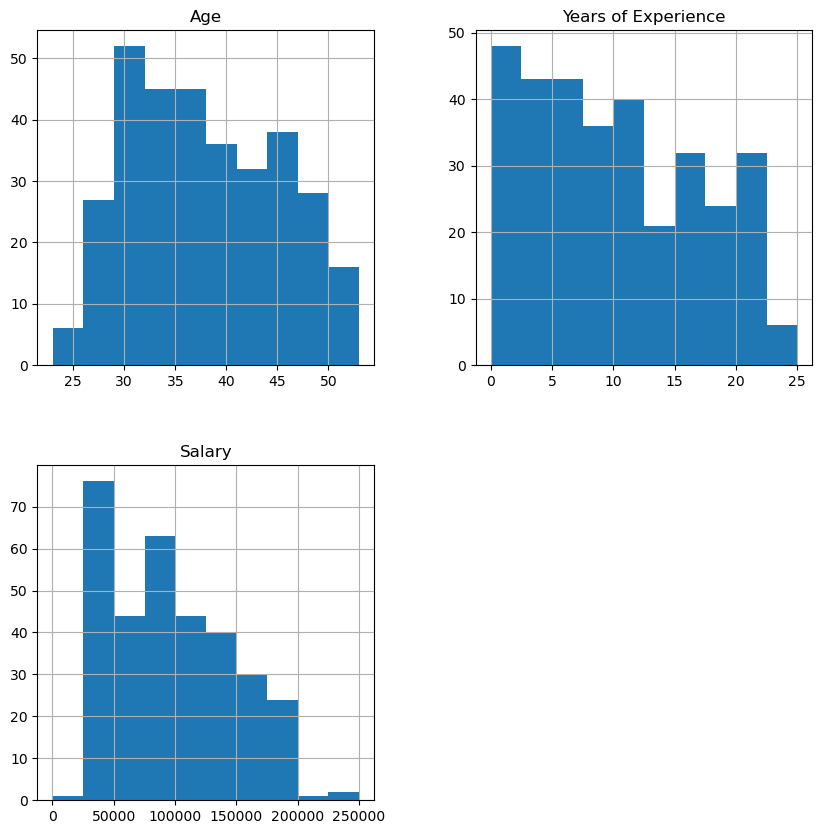

In [26]:
# Histogram of each feature
data.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

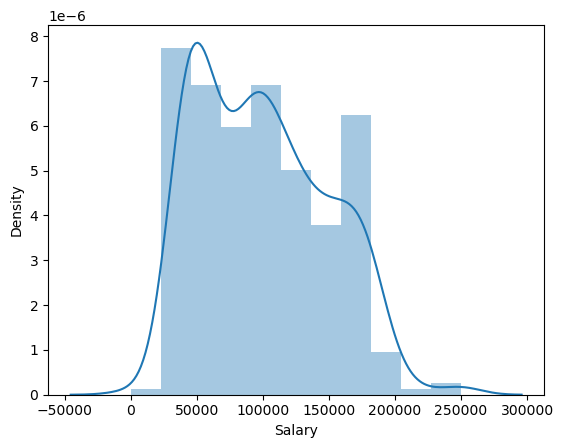

In [27]:
sns.distplot(data.Salary)

* Salary is Normal distribution

### Numerical Data Ploting 

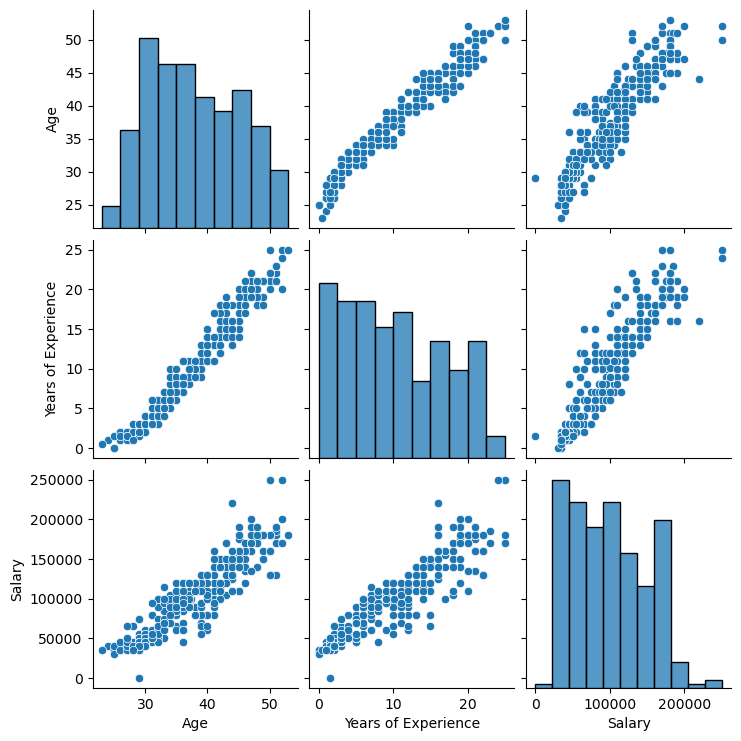

In [28]:
#  Scatter plot
# pairplot matrix    (for multiple scatter plot we use pairplot)
sns.pairplot(data)

<AxesSubplot:>

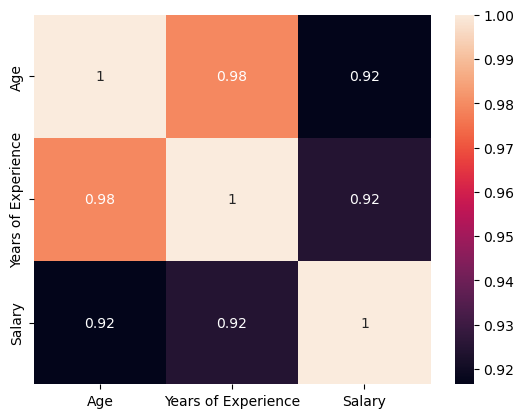

In [29]:
sns.heatmap(data[data.describe().columns.to_list()].corr(),annot = True)

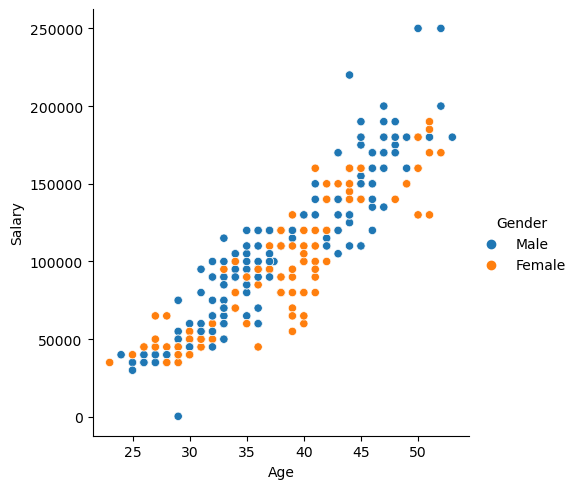

In [30]:
# Salary vs Age
sns.relplot(x='Age',y='Salary',data=data,hue='Gender')

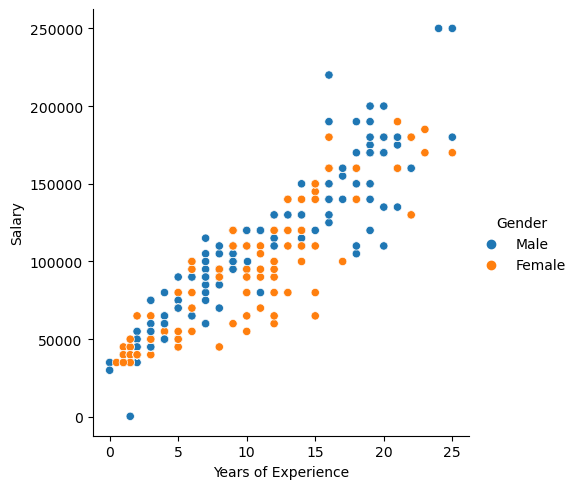

In [31]:
# Salary vs Years of Experience
sns.relplot(x='Years of Experience',y='Salary',data=data,hue='Gender')

### Categorical Data Ploting

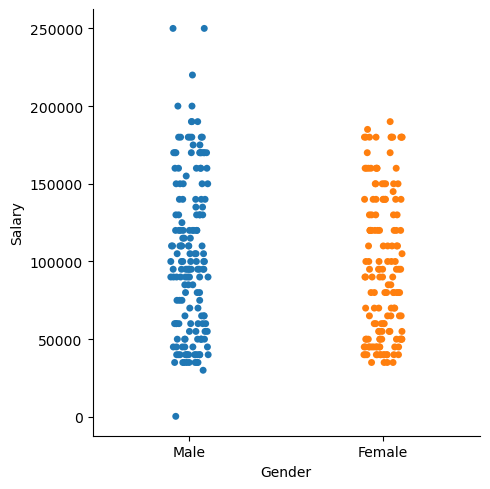

In [32]:
# Gender vs Salary
# catplot :- The default representation of catplot is a scatter plot for 1 numerical and one or more categorical variable
sns.catplot(x='Gender',y='Salary',data=data)      # x=categorical variable,y=numerical variable

In [33]:
countMale = len(data[data.Gender == 'Male'])
countFemale = len(data[data.Gender == 'Female'])


print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(data.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(data.Gender))*100)))


Percentage of Male applicant: 52.62%
Percentage of Female applicant: 47.38%


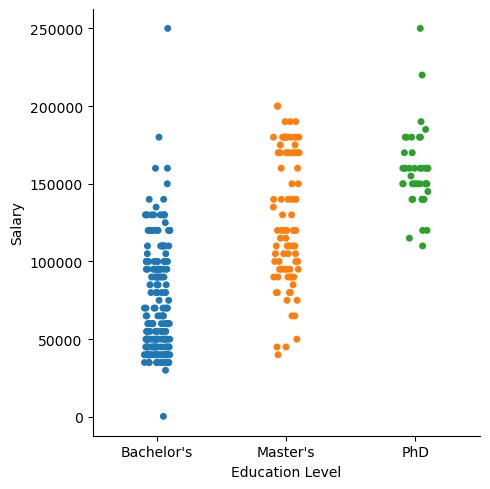

In [34]:
# Education Level vs Salary
sns.catplot(x='Education Level',y='Salary',data=data)

### Converting Categorical variable to Numerical Variable

In [35]:
df = ['Gender', 'Education Level', 'Job Title']

In [36]:
data = pd.get_dummies(columns = df, drop_first = True, data = data)

In [37]:
data.head()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split the dataframe into X & y

In [38]:
# Separate object for target feature 
y = data['Salary']

# Separate object for Predictors 
x = data.drop('Salary',axis=1)

In [39]:
x.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y.head()

0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [42]:
x_train.shape,y_train.shape

((260, 178), (260,))

In [43]:
x_test.shape,y_test.shape

((65, 178), (65,))

### Build the Regression Algorithm

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)


RandomForestRegressor()

## Evaluation Metrics

In [59]:
# Train Score
train_score = model.score(x_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.9839410292437639


In [60]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test) 
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.8755810723923342


In [64]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test,y_pred)
print(' mean_squared_error =',score)
print('Root Mean Squared Error =',np.sqrt(mean_squared_error(y_test,y_pred)))

 mean_squared_error = 227463652.63959843
Root Mean Squared Error = 15081.898177603456


In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
model = Ridge()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8961960042910319